# Importing Data From Excel Files

## Introduction to spreadsheets

In [1]:
import pandas as pd
survey_responses = pd.read_excel("fcc-new-coder-survey.xlsx")
print(survey_responses.head())

   FreeCodeCamp New Developer Survey Responses, 2016        Unnamed: 1  \
0  Source: https://www.kaggle.com/freecodecamp/20...               NaN   
1                                                Age  AttendedBootcamp   
2                                                 28                 0   
3                                                 22                 0   
4                                                 19                 0   

       Unnamed: 2         Unnamed: 3    Unnamed: 4         Unnamed: 5  \
0             NaN                NaN           NaN                NaN   
1  BootcampFinish  BootcampLoanYesNo  BootcampName  BootcampRecommend   
2             NaN                NaN           NaN                NaN   
3             NaN                NaN           NaN                NaN   
4             NaN                NaN           NaN                NaN   

       Unnamed: 6                     Unnamed: 7            Unnamed: 8  \
0             NaN                         

### Load a portion of a spreadsheet


In [2]:
col_string = "AD, AW:BA"
survey_responses = pd.read_excel("fcc-new-coder-survey.xlsx",
                                skiprows=2, usecols=col_string)
print(survey_responses.columns)

Index(['ExpectedEarning', 'JobApplyWhen', 'JobPref', 'JobRelocateYesNo',
       'JobRoleInterest', 'JobWherePref'],
      dtype='object')


## Getting data from multiple worksheets

By default read excel pulls data from the first sheet in a workbook only. Appennding of dataframes can be done with for loop if there are more than 2 dataframes.

### Select a single sheet


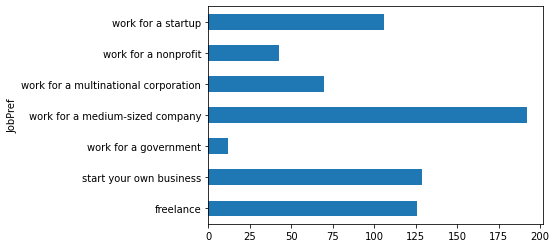

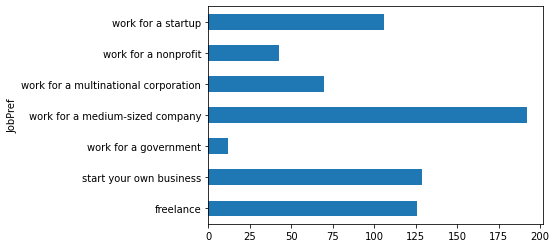

In [3]:
import matplotlib.pyplot as plt

responses_2017 = pd.read_excel("fcc-new-coder-survey.xlsx", skiprows=2,sheet_name=1)
job_prefs = responses_2017.groupby("JobPref").JobPref.count()
job_prefs.plot.barh()
plt.show()

responses_2017 = pd.read_excel("fcc-new-coder-survey.xlsx", skiprows=2,sheet_name="2017")
job_prefs = responses_2017.groupby("JobPref").JobPref.count()
job_prefs.plot.barh()
plt.show()


### Select multiple sheets


In [4]:
all_survey_data = pd.read_excel("fcc-new-coder-survey.xlsx", skiprows=2,sheet_name=["2016","2017"])
print(type(all_survey_data))

all_survey_data = pd.read_excel("fcc-new-coder-survey.xlsx", skiprows=2,sheet_name=[0,"2017"])
print(all_survey_data.keys())

all_survey_data = pd.read_excel("fcc-new-coder-survey.xlsx", skiprows=2,sheet_name=None)
print(all_survey_data.keys())

<class 'dict'>
dict_keys([0, '2017'])
dict_keys(['2016', '2017'])


### Work with multiple spreadsheets

2
Adding 1000 row
Adding 1000 row


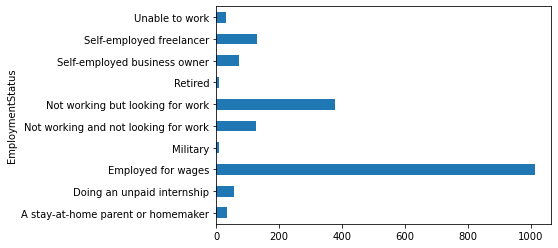

In [5]:
print(len(all_survey_data.values()))

all_responses = pd.DataFrame()
for df in all_survey_data.values():
    print("Adding {} row".format(df.shape[0]))
    all_responses = all_responses.append(df)
    
counts = all_responses.groupby("EmploymentStatus").EmploymentStatus.count()
counts.plot.barh()
plt.show()

## Modifying imports: true/false data

### Set Boolean columns

Datasets may have columns that are most accurately modeled as Boolean values. However, pandas usually loads these as floats by default, since defaulting to Booleans may have undesired effects like turning NA values into Trues.

In [7]:
import numpy as np
columns = ['ID.x', 'HasDebt', 'HasFinancialDependents', 'HasHomeMortgage', 'HasStudentDebt']
survey_data = pd.read_excel("fcc-new-coder-survey.xlsx", skiprows=2, usecols=columns)
survey_data["HasDebt"] = survey_data["HasDebt"].replace(np.nan,0)
print(survey_data.isna().sum())

# survey_data = pd.read_excel("fcc-new-coder-survey.xlsx", skiprows=2, usecols=columns, 
#                             dtype={"HasDebt":bool})
survey_data["HasDebt"] = survey_data["HasDebt"].astype(bool)
print(survey_data.groupby("HasDebt").sum())

HasDebt                     0
HasFinancialDependents      9
HasHomeMortgage           499
HasStudentDebt            502
ID.x                        0
dtype: int64
         HasFinancialDependents  HasHomeMortgage  HasStudentDebt
HasDebt                                                         
False                     112.0              0.0             0.0
True                      205.0            151.0           281.0


### Set custom true/false values

In Boolean columns, pandas automatically recognizes certain values, like "TRUE" and 1, as True, and others, like "FALSE" and 0, as False. Some datasets, like survey data, can use unrecognized values, such as "Yes" and "No".

In [8]:
columns = ['ID.x', 'AttendedBootcamp', 'HasDebt', 'HasFinancialDependents', 'HasHomeMortgage', 'HasStudentDebt']
survey_data = pd.read_excel("fcc-new-coder-survey.xlsx", skiprows=2, usecols=columns)
survey_data["AttendedBootcamp"]= survey_data["AttendedBootcamp"].replace(np.nan,0.0)
survey_data["HasDebt"] = survey_data["HasDebt"].replace(np.nan,0)
survey_data["AttendedBootcamp"] =survey_data["AttendedBootcamp"].replace([0.0,1.0],["No","Yes"])
print(survey_data)

survey_subset = pd.read_csv("survey_subset.csv", dtype={"HasDebt": bool,
                              "AttendedBootCampYesNo": bool},
                              true_values=["Yes"],
                              false_values=["No"], index_col=0)
print(survey_subset)

    AttendedBootcamp  HasDebt  HasFinancialDependents  HasHomeMortgage  \
0                 No      1.0                     1.0              0.0   
1                 No      0.0                     0.0              NaN   
2                 No      0.0                     0.0              NaN   
3                 No      1.0                     0.0              0.0   
4                 No      1.0                     0.0              0.0   
..               ...      ...                     ...              ...   
995               No      1.0                     1.0              1.0   
996               No      0.0                     0.0              NaN   
997               No      0.0                     0.0              NaN   
998               No      1.0                     1.0              0.0   
999               No      0.0                     1.0              NaN   

     HasStudentDebt                              ID.x  
0               1.0  cef35615d61b202f1dc794ef2746df14  

## Modifying imports: parsing dates

If the date is non-Standard it can be converted to DateTime by using to_datetime()

### Parse simple dates

In [9]:
survey_data = pd.read_excel("fcc-new-coder-survey.xlsx",skiprows=2, parse_dates=["Part1StartTime"])
survey_data["Part1StartTime"]

0     2016-03-29 21:23:13
1     2016-03-29 21:24:59
2     2016-03-29 21:25:37
3     2016-03-29 21:21:37
4     2016-03-29 21:26:22
              ...        
995   2016-03-30 09:01:28
996   2016-03-30 08:59:42
997   2016-03-30 09:02:36
998   2016-03-30 08:55:15
999   2016-03-30 09:03:45
Name: Part1StartTime, Length: 1000, dtype: datetime64[ns]

### Get datetimes from multiple columns

In [10]:
# datetime_cols = survey_data["Part2StartTime"]
# a=pd.DataFrame(datetime_cols.str.split().tolist(), columns=["Part2StartDate","Part2StartTime"])
# spliting a column into 2 different columns.

datetime_cols = {"Part2Start": ["Part2StartDate", "Part2StartTime"]}

survey_data = pd.read_excel("dates.xlsx",parse_dates=datetime_cols, index_col=1)
print(survey_data.describe())

                 Part2Start
count                  1000
unique                  985
top     2016-03-30 01:29:27
freq                      2
first   2016-03-29 21:24:57
last    2016-03-30 09:08:18


### Parse non-standard date formats

In [11]:
survey_data["Part2Start"]=survey_data["Part2Start"].dt.strftime('%d%m%y %H:%M:%S')
print(survey_data.head())

survey_data["Part2Start"] = pd.to_datetime(survey_data["Part2Start"], 
                                           format="%d%m%y %H:%M:%S")
survey_data.head()

        Part2Start
0  290316 21:24:57
1  290316 21:27:14
2  290316 21:27:13
3  290316 21:28:51
4  290316 21:29:32


,Part2Start
0,2016-03-29 21:24:57
1,2016-03-29 21:27:14
2,2016-03-29 21:27:13
3,2016-03-29 21:28:51
4,2016-03-29 21:29:32
